In [1]:
import plotly
import cufflinks
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import cvxopt as opt
from cvxopt import blas, solvers
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
prices = yf.download(["PETR4.SA", 'BBDC4.SA', 'TASA4.SA', 'PRIO3.SA','VIIA3.SA'])['Adj Close'].fillna(0)

[*********************100%***********************]  5 of 5 completed


In [3]:
r = prices.pct_change()
solvers.options['show_progress'] = False

In [4]:
w = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
R = np.dot(r, w) #retorno do portfólio

In [8]:
def generate_wallets(prices, num_portfolios = 50000, risk_free = 0.000358):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # média dos retornos
    r = prices.pct_change().fillna(0)
    r.replace([np.inf, -np.inf], 0, inplace=True)
    mean_returns = r.mean()

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(r.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w)))

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [22]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [16]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

In [11]:
prices = yf.download(["PETR4.SA", 'BBDC4.SA', 'TASA4.SA', 'PRIO3.SA'])['Adj Close'].fillna(0)
w = [0.2, 0.2, 0.2, 0.2, 0.2]

[*********************100%***********************]  4 of 4 completed


In [30]:
wallets = generate_wallets(prices)
best_portfolio = best_portfolio(wallets)

TypeError: 'numpy.ndarray' object is not callable

In [41]:
type(wallets['weights'])

list

In [32]:
best_portfolio

array([4.49927283e-04, 5.10640145e-01, 1.15950424e-01, 3.72959504e-01])

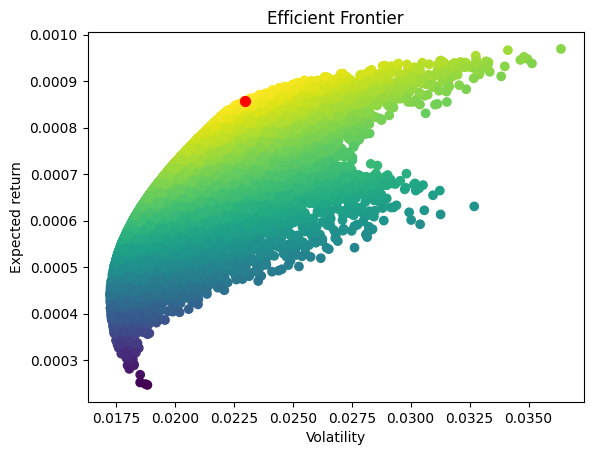

In [21]:
r = plot_efficient_frontier(wallets)